In [1]:
from myptv.imaging_mod import camera_wrapper, img_system
import numpy as np
import matplotlib.pyplot as plt

# Input parameters:

Here you choose which calibration model and which camera you want to would like to use for the line of sight

In [74]:
ThreeDModel = 'ExtendedZolof'     # <-- set either to 'Tsai' or to 'ExtendedZolof'
cam_name = 'cam3'        # <-- set to one of: cam0, cam1, cam2, cam3

###### Here we load the data. No need to play with this.

In [75]:
if ThreeDModel=='Tsai':
    directory = 'cam_Tsai'

elif ThreeDModel=='ExtendedZolof':
    directory = 'cam_extendedZolof'

cam = camera_wrapper(cam_name, directory)
cam.load()

print(cam)

Camera Wrapper instance; camera loaded:

Extended Zolof model camera instace. cam3
 O: [ -22.61988766   -8.09718574 1125.48942219]


###### Here I define and use the LineOfSight class. Again, no need t oplay with this.

In [79]:
class LineOfSight(object):
    
    def __init__(self, cam):
        
        self.cam = cam
        
    
    def get_line(self, x, y):
        P, v = self.cam.get_epipolarline(x, y)
        return P, v
    
    
    def plot_line(self, x, y):
        P, v = self.get_line(x, y)
        
        
        axis = plt.figure(figsize=(10,8)).add_subplot(projection='3d')
        axis.set_xlabel('X'), axis.set_ylabel('Y'), axis.set_zlabel('Z')
        axis.set_xlim(-50,350), axis.set_ylim(-50,350), axis.set_zlim(0,1200)

        axis.set_box_aspect([axis.get_xlim()[1] - axis.get_xlim()[0],
                             axis.get_ylim()[1] - axis.get_ylim()[0],
                             axis.get_zlim()[1] - axis.get_zlim()[0]])

        axis.plot([0,300],[0,0],[0,0],c='black'), axis.plot([0,0],[0,300],[0,0],c='black'), axis.plot([0,0],[0,0],[0,300],c='black')
        axis.plot([300,300],[0,300],[0,0],c='black'), axis.plot([300,300],[0,0],[0,300],c='black'), axis.plot([0,300],[300,300],[0,0],c='black')
        axis.plot([0,0],[300,300],[0,300],c='black'), axis.plot([0,300],[0,0],[300,300],c='black'), axis.plot([0,0],[0,300],[300,300],c='black')
        axis.plot([300,300],[300,300],[0,300],c='black'), axis.plot([300,300],[0,300],[300,300],c='black'), axis.plot([0,300],[300,300],[300,300],c='black')


        plt.plot(P[0],P[1],P[2],'o',c='green')
        
        curve_3D = np.array([P+10*v])
        for a_ in np.linspace(0, -P[2]/v[2], num=10):
            curve_3D = np.concatenate((curve_3D, np.array([P + a_*v])))
        
        plt.plot(curve_3D[:,0],curve_3D[:,1],curve_3D[:,2],'-',c='red')
        
        
        
        

LOS = LineOfSight(cam)

# Using the LineOfSight:

To get the line of sight use:
     
     LOS.get_line(x, y)
     
where x and y are the pixels coordinates that you can choose. This returns P and v, which are a point on the 3D line of sight and the direction vector pointing along the line. 


To plot the line of sight use 
     
     LOS.plot_line(x, y)

where x and y are the pixels coordinates that you can choose

In [80]:
LOS.get_line(500,500)

(array([ -22.61988766,   -8.09718574, 1125.48942219]),
 array([ 0.02694272,  0.19085463, -0.98124787]))

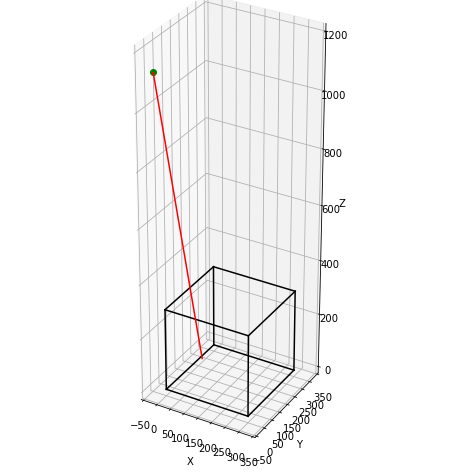

In [81]:
LOS.plot_line(500,500)